In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 5.1 Cross-Validation

**5.1.1 The Validation Set Approach**

In [3]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**FIGURE 5.2.**

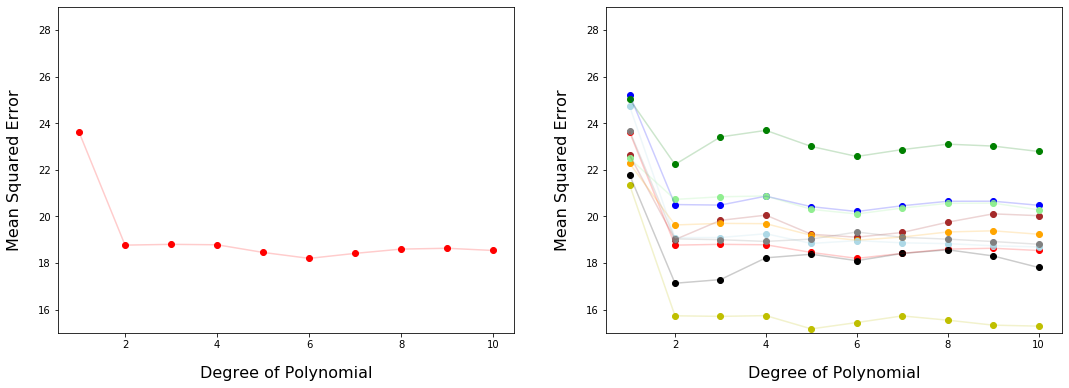

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def msr_of_polynomial(data,model,degree = 1,test_size = 0.2,random_state = 0):
    lin_reg = linear_model.LinearRegression()
    train_set, test_set = train_test_split(data, test_size = test_size, random_state = random_state)
    y_train,X_train = patsy.dmatrices(model,data = train_set,return_type="dataframe")
    y_test,X_test = patsy.dmatrices(model,data = test_set,return_type="dataframe")
    poly_features = PolynomialFeatures(degree = degree,include_bias=False)
    X_train_degree = poly_features.fit_transform(X_train)
    X_test_degree =  poly_features.fit_transform(X_test)
    lin_reg.fit(X_train_degree,y_train)
    msr = mean_squared_error(y_test,lin_reg.predict(X_test_degree))
    return msr
plt.figure(figsize=(18,6))
X_draw = pd.Series(np.arange(1,11))
plt.subplot(121)
f = lambda x: msr_of_polynomial(Auto,'mpg ~ 0 + horsepower',x,0.5)
plt.scatter(X_draw,X_draw.apply(f),color = 'r')
plt.plot(X_draw,X_draw.apply(f),color = 'r',alpha = 0.2)
plt.ylim(15,29)
plt.yticks(np.linspace(16,28,7))
plt.xlabel('Degree of Polynomial', fontsize=16,labelpad = 16)
plt.ylabel('Mean Squared Error', fontsize=16,labelpad = 16)
plt.subplot(122)
color_pool = ['r','b','g','y','brown','orange','lightblue','lightgreen','black','gray']
for i in range(10):
    f = lambda x: msr_of_polynomial(Auto,'mpg ~ 0 + horsepower',x,0.5,i*100)
    plt.scatter(X_draw,X_draw.apply(f),color = color_pool[i])
    plt.plot(X_draw,X_draw.apply(f),color = color_pool[i] ,alpha = 0.2)
plt.ylim(15,29)
plt.yticks(np.linspace(16,28,7))
plt.xlabel('Degree of Polynomial', fontsize=16,labelpad = 16)
plt.ylabel('Mean Squared Error', fontsize=16,labelpad = 16)
plt.show()

**5.1.2 Leave-One-Out Cross-Validation**

**5.1.3 k-Fold Cross-Validation**

**FIGURE 5.4.**

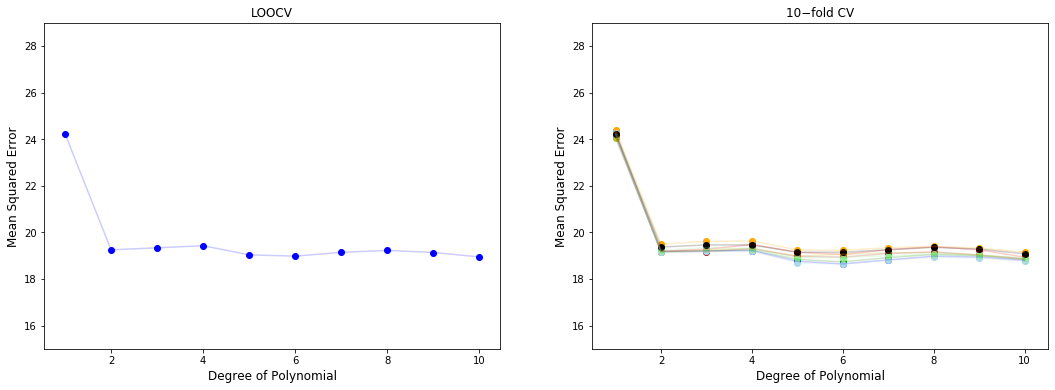

In [5]:
#LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1) where n is the number of samples.所以这里可以不使用
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def msr_of_polynomial_cv(data,model,degree = 1,cv = 10,groups = None):
    lin_reg = linear_model.LinearRegression()
    y,X = patsy.dmatrices(model,data = data,return_type="dataframe")
    poly_features = PolynomialFeatures(degree = degree,include_bias=False)
    X_degree = poly_features.fit_transform(X)
    msr = -cross_val_score(lin_reg, X_degree, y, cv = cv, scoring='neg_mean_squared_error',groups = groups)
    return msr
X_draw = pd.Series(np.arange(1,11))
plt.figure(figsize=(18,6))
plt.subplot(121)
#LeaveOneOut() is equivalent to KFold(n_splits=n)
n_splits = len(Auto)
f = lambda x: (msr_of_polynomial_cv(Auto,'mpg ~ 0 + horsepower',x,n_splits)).mean()
plt.scatter(X_draw,X_draw.apply(f),color = 'b')
plt.plot(X_draw,X_draw.apply(f),color = 'b',alpha = 0.2)
plt.ylim(15,29)
plt.yticks(np.linspace(16,28,7))
plt.xlabel('Degree of Polynomial', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('LOOCV')
plt.subplot(122)
color_pool = ['r','b','g','y','brown','orange','lightblue','lightgreen','black','gray']
for i in range(9):
    np.random.seed(i)
    shuffled_indices = np.random.permutation(len(Auto))
    f = lambda x: (msr_of_polynomial_cv(Auto.iloc[shuffled_indices],'mpg ~ 0 + horsepower',x,10)).mean()
    plt.scatter(X_draw,X_draw.apply(f),color = color_pool[i])
    plt.plot(X_draw,X_draw.apply(f),color = color_pool[i] ,alpha = 0.2)
plt.xlabel('Degree of Polynomial', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.ylim(15,29)
plt.yticks(np.linspace(16,28,7))
plt.title('10−fold CV')
plt.show()

**5.1.4 Bias-Variance Trade-Off for k-Fold Cross-Validation**

**5.1.5 Cross-Validation on Classification Problems**

# 5.2 The Bootstrap

In [6]:
Portfolio = pd.read_csv("data/Portfolio.csv")
Portfolio.head()

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983


In [7]:
#根据自助法数据 α估计生成标准误差
def alpha_fn(data, index_start = 0,index_end = None):
    if index_end == None:
        index_end = len(data)
    X = data['X'].iloc[index_start:index_end]
    Y = data['Y'].iloc[index_start:index_end]
    return (np.var(Y) - np.cov(X,Y)[0,1])/(np.var(X) + np.var(Y) - 2* np.cov(X,Y)[0,1])
    #对于pd数据，可以使用return (Y.var() - X.cov(Y))/(X.var() + Y.var() - 2* X.cov(Y))

In [8]:
#> alpha.fn(Portfolio ,1:100)
alpha_fn(Portfolio)

0.5766511516104116

In [9]:
#定义自助法生成数据(n_shape为每个样本大小，m_sample为生成样本个数)
def bootstrap_data(data, n_shape = 0 ,m_sample = 10):
    if  n_shape == 0:
        n_shape = len(data)
    train_list = []
    for random_state in range(m_sample):
        train = data.sample(n = n_shape,replace=True,random_state= random_state)
        train_list.append(train)
    return train_list

In [10]:
#> boot(Portfolio ,alpha.fn,R=1000)定义对data根据statistic统计方式采样R次的生成数据，详见实验
def bootstrap_stats(data, statistic, R):
    n_shape = len(data)
    try:
        statistic_original = list(statistic(data))
    except TypeError:
        statistic_original = [statistic(data)]
    statistic_list = []
    train_list = []
    statistic_len = len(statistic_original)
    for statistic_t in range(statistic_len):
        statistic_list.append([])
    for random_state in range(R):
        train = data.sample(n = n_shape,replace=True,random_state= random_state)
        try:
            float(statistic(train))
        except:
            try: 
                for statistic_factor in list(statistic(train)):
                    float(statistic_factor)
            except:
                continue
        train_list.append(train)
        for statistic_t in range(statistic_len):
            try:
                statistic_list[statistic_t].append(list(statistic(train))[statistic_t])
            except TypeError:
                statistic_list[statistic_t].append([statistic(train)][statistic_t])
    statistic_index = []
    statistic_mean = []
    statistic_std_error = []
    statistic_bias = []
    for statistic_t in range(statistic_len):
        statistic_index.append('t' + str(statistic_t) + '*')
        statistic_mean.append(np.mean(statistic_list[statistic_t]))
        statistic_std_error.append(((np.sum((statistic_list[statistic_t] - statistic_mean[statistic_t]) ** 2)) / (R - 1)) ** 0.5)
        statistic_bias.append(statistic_original[statistic_t] - statistic_mean[statistic_t])
    bootstrap_stats_pd = pd.DataFrame({'original':statistic_original,
                                       'mean':statistic_mean,
                                       'bias':statistic_bias,
                                       'std. error':statistic_std_error                                      
                                      },
                                     index = statistic_index)
    print(bootstrap_stats_pd)
    return statistic_list

**FIGURE 5.9.**

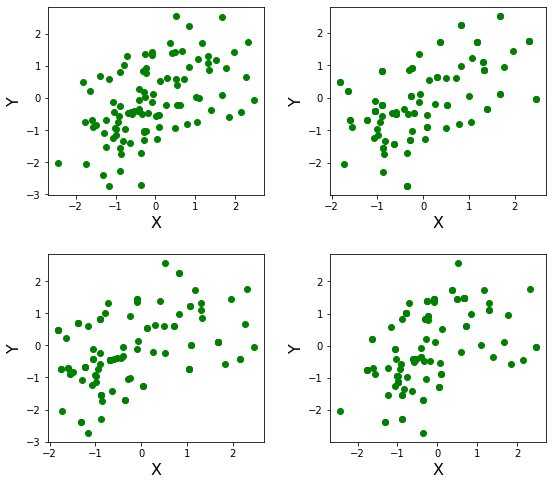

In [11]:
# 利用网格确定图形的位置
from matplotlib.gridspec import GridSpec
train_list =  bootstrap_data(Portfolio, m_sample = 3)
fig = plt.figure(figsize=(16, 8))
gs = GridSpec(16, 16) 
ax1 = fig.add_subplot(gs[:7, 3:7])
ax1.scatter(Portfolio['X'],Portfolio['Y'],color='g', marker='o')
ax1.set_xlabel("X", fontsize=16)
ax1.set_ylabel("Y", fontsize=16)
ax2 = fig.add_subplot(gs[:7, 8:12])
ax2.scatter(train_list[0]['X'],train_list[0]['Y'],color='g', marker='o')
ax2.set_xlabel("X", fontsize=16)
ax2.set_ylabel("Y", fontsize=16)
ax3 = fig.add_subplot(gs[9:, 3:7])
ax3.scatter(train_list[1]['X'],train_list[1]['Y'],color='g', marker='o')
ax3.set_xlabel("X", fontsize=16)
ax3.set_ylabel("Y", fontsize=16)
ax4 = fig.add_subplot(gs[9:, 8:12])
ax4.scatter(train_list[2]['X'],train_list[2]['Y'],color='g', marker='o')
ax4.set_xlabel("X", fontsize=16)
ax4.set_ylabel("Y", fontsize=16)
plt.show()

In [12]:
for train in train_list:
    print(alpha_fn(train))

0.560336658007497
0.4504820492455901
0.6491078066222176


**FIGURE 5.10.**

In [13]:
#生成相关数据
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1.25]]
#x, y = np.random.multivariate_normal(mean, cov, 100)
#真实总体生成1000个模拟数据alpha
simulated_data_sets_alpha = []
for test_num in range(1000):
    rng = np.random.RandomState(1983 + test_num)
    simulated_data = pd.DataFrame(rng.multivariate_normal(mean, cov, 100),columns = ['X','Y'])
    simulated_data_sets_alpha.append(alpha_fn(simulated_data))
    simulated_alpha = pd.DataFrame(simulated_data_sets_alpha , columns = ['alpha'])
print('真实总体生成1000个模拟数据集的平均alpha：',np.mean(simulated_alpha))
#一个数据集生成的1000个自助法样本alpha
rng = np.random.RandomState(1983)
simulated_data = pd.DataFrame(rng.multivariate_normal(mean, cov, 100),columns = ['X','Y'])
#打印mean为1000个自助数据alpha均值，std. error即估计量标准差
bootstrap_alpha = pd.DataFrame(bootstrap_stats(simulated_data, alpha_fn, 1000)[0], columns = ['alpha'])

真实总体生成1000个模拟数据集的平均alpha： alpha    0.601536
dtype: float64
     original      mean      bias  std. error
t0*   0.57797  0.583729 -0.005759    0.102724


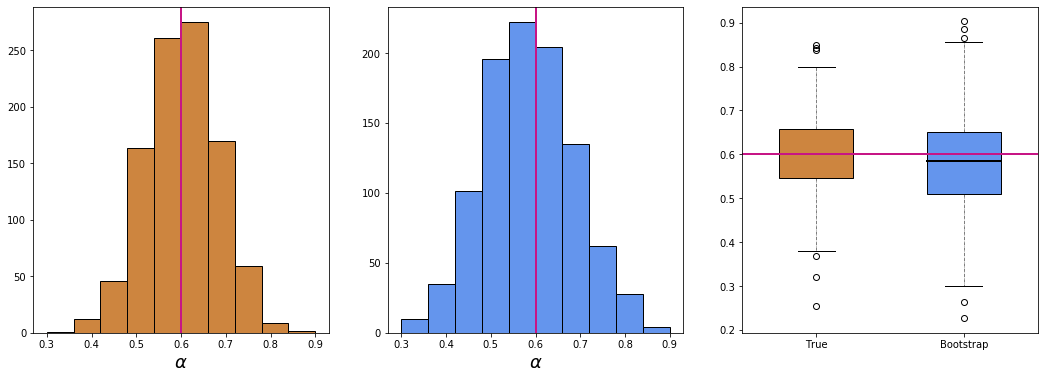

In [14]:
#生成5-10
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.hist(simulated_alpha['alpha'],bins = 10,range = (0.3,0.9),color='peru',edgecolor='black')
plt.axvline(x = 0.6,linewidth = 2,color = 'mediumvioletred')
plt.xlabel(r"$\alpha$", fontsize=18)
plt.subplot(132)
plt.hist(bootstrap_alpha['alpha'],bins = 10,range = (0.3,0.9),color='cornflowerblue',edgecolor='black')
plt.axvline(x = 0.6,linewidth = 2,color = 'mediumvioletred')
plt.xlabel(r"$\alpha$", fontsize=18)
plt.subplot(133)
data_compare = [simulated_alpha['alpha'],bootstrap_alpha['alpha']]
bp = plt.boxplot(data_compare,sym = 'o', patch_artist = True ,widths=0.5,labels = ['True','Bootstrap'],zorder = 1)
plt.setp(bp['boxes'], color='Black', linewidth=1)
plt.setp(bp['whiskers'], color='k', linewidth=0.5,linestyle='-.')
plt.setp(bp['caps'], color='Black', linewidth=1)
plt.setp(bp['medians'], color='Black', linewidth=2)
plt.setp(bp['fliers'], marker='o',color='Black',linewidth=0.5,alpha = 1)
bp['boxes'][0].set(facecolor = 'peru' )
bp['boxes'][1].set(facecolor = 'cornflowerblue')
plt.axhline(y = 0.6,linewidth = 2,color = 'mediumvioletred',zorder = 2)
plt.show()

In [15]:
#根据公式5.8生成标准误差
def bootstrap_standard_error(alpha_list):
    B = len(alpha_list)
    alpha_list = np.array(alpha_list)
    SE = (((alpha_list - alpha_list.mean()) ** 2).sum()/(B - 1)) ** 0.5
    return SE
bootstrap_standard_error(bootstrap_alpha)

0.10272413167955524